### Stock Market Prediction And Forecasting Using Stacked LSTM

steps to be performed:
    
    1. we will collect the stock data --AAPL ✔
    
    2. preprocess the Data - Train and Test ✔
    
    3. create an stacked LSTM model ✔
    
    4. predict the test data and plot the output ✔
    
    5. predict the future 30 days and plot the output ✔

In [3]:
!pip install pandas_datareader


     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00


In [4]:
import pandas_datareader as pdr

In [6]:
key = '5b0f2edb0c4f73bf0bd924bba759e805fb6b57fd'

In [7]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\asus\AppData\Local\Temp\ipykernel_11312\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [8]:
df.to_csv('AAPL.csv')

In [9]:
import pandas as pd

In [14]:
df = pd.read_csv('AAPL.csv')


In [15]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-03-06 00:00:00+00:00,174.52,175.49,173.94,174.67,20810384,42.001241,42.234688,41.861654,42.037341,83241536,0.0,1.0
1,AAPL,2019-03-07 00:00:00+00:00,172.50,174.44,172.02,173.87,24796374,41.515093,41.981988,41.399573,41.844807,99185496,0.0,1.0
2,AAPL,2019-03-08 00:00:00+00:00,172.91,173.07,169.50,170.32,23999358,41.613767,41.652274,40.793092,40.990439,95997432,0.0,1.0
3,AAPL,2019-03-11 00:00:00+00:00,178.90,179.12,175.35,175.49,32011034,43.055363,43.108310,42.200995,42.234688,128044136,0.0,1.0
4,AAPL,2019-03-12 00:00:00+00:00,180.91,182.67,179.37,180.00,32467584,43.539104,43.962679,43.168477,43.320097,129870336,0.0,1.0


In [16]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2024-02-26 00:00:00+00:00,181.16,182.7600,180.65,182.24,40867421,181.16,182.7600,180.65,182.24,40867421,0.0,1.0
1253,AAPL,2024-02-27 00:00:00+00:00,182.63,183.9225,179.56,181.10,54318851,182.63,183.9225,179.56,181.10,54318851,0.0,1.0
1254,AAPL,2024-02-28 00:00:00+00:00,181.42,183.1200,180.13,182.51,48953939,181.42,183.1200,180.13,182.51,48953939,0.0,1.0
1255,AAPL,2024-02-29 00:00:00+00:00,180.75,182.5700,179.53,181.27,136682597,180.75,182.5700,179.53,181.27,136682597,0.0,1.0
1256,AAPL,2024-03-01 00:00:00+00:00,179.66,180.5300,177.38,179.55,73563082,179.66,180.5300,177.38,179.55,73563082,0.0,1.0


In [19]:
df1 = df.reset_index()

In [20]:
df1 = df.reset_index()['close'] #taking only close column

In [24]:
df1

0       174.52
1       172.50
2       172.91
3       178.90
4       180.91
         ...  
1252    181.16
1253    182.63
1254    181.42
1255    180.75
1256    179.66
Name: close, Length: 1257, dtype: float64

In [21]:
df1.shape

(1257,)

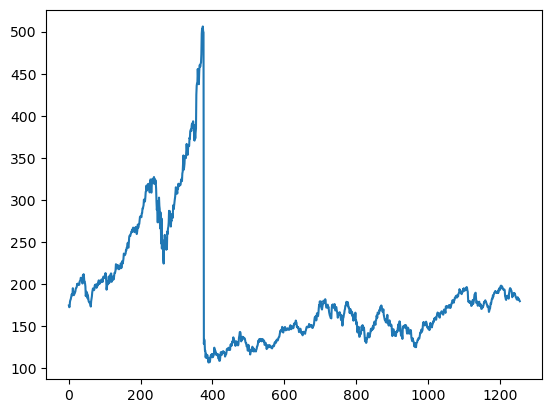

In [25]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [26]:
###LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [27]:
import numpy as np


In [28]:
df1

0       174.52
1       172.50
2       172.91
3       178.90
4       180.91
         ...  
1252    181.16
1253    182.63
1254    181.42
1255    180.75
1256    179.66
Name: close, Length: 1257, dtype: float64

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [31]:
df1

array([[0.16951785],
       [0.16445836],
       [0.16548528],
       ...,
       [0.18680025],
       [0.1851221 ],
       [0.18239198]])

In [30]:
df1.shape

(1257, 1)

lets say the values for diff day are:
day1, day2, day3, ....
120, 130, 125,....


incase of regression of classification we train test split data by
Cross Validation
random seed


but for timeseries data its diff
here the day 2 data can be dependent on day 1 day 3 on day 2 like that
so,

120, 130, 125 ,140 ,134 ,150 |||| , 160, 190, 154

timeseries ---> Train 120, 130, 125, 140, 134, 150
Test --- 160, 190, 154

In [32]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65) #65% train size
test_size = len(df1) - training_size
                            #from 0 to 817 index         after 817 index
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [33]:
training_size

817

In [34]:
test_size

440

In [35]:
len(train_data)

817

In [36]:
len(test_data)

440

In [37]:
train_data

array([[1.69517846e-01],
       [1.64458359e-01],
       [1.65485285e-01],
       [1.80488416e-01],
       [1.85522855e-01],
       [1.87526612e-01],
       [1.92586099e-01],
       [1.98572323e-01],
       [2.03331246e-01],
       [1.99599249e-01],
       [2.03681904e-01],
       [2.21039449e-01],
       [2.10920476e-01],
       [2.05134627e-01],
       [2.00250470e-01],
       [2.04458359e-01],
       [2.05084534e-01],
       [2.08165310e-01],
       [2.11396368e-01],
       [2.18359424e-01],
       [2.21690670e-01],
       [2.22542267e-01],
       [2.25823419e-01],
       [2.33587977e-01],
       [2.32085160e-01],
       [2.34890420e-01],
       [2.30707577e-01],
       [2.30507201e-01],
       [2.31408892e-01],
       [2.31458986e-01],
       [2.41177207e-01],
       [2.43005636e-01],
       [2.44683782e-01],
       [2.52072636e-01],
       [2.51271133e-01],
       [2.46562304e-01],
       [2.44107702e-01],
       [2.44884158e-01],
       [2.35015654e-01],
       [2.59686913e-01],


In [38]:
test_data

array([[0.10487163],
       [0.11113338],
       [0.096531  ],
       [0.09843456],
       [0.10487163],
       [0.10299311],
       [0.08966813],
       [0.07586725],
       [0.0627176 ],
       [0.06492173],
       [0.07160927],
       [0.05815905],
       [0.06191609],
       [0.07271133],
       [0.07140889],
       [0.0787226 ],
       [0.08721353],
       [0.08721353],
       [0.07664371],
       [0.08112711],
       [0.07484033],
       [0.0803757 ],
       [0.08696306],
       [0.09036944],
       [0.09896055],
       [0.10068879],
       [0.0952536 ],
       [0.09773325],
       [0.09680651],
       [0.10427051],
       [0.10852849],
       [0.10076393],
       [0.11060739],
       [0.11571697],
       [0.12150282],
       [0.1183469 ],
       [0.11549155],
       [0.11211021],
       [0.12510958],
       [0.12651221],
       [0.13943644],
       [0.13693175],
       [0.1331747 ],
       [0.14850344],
       [0.14770194],
       [0.14654978],
       [0.14534753],
       [0.145

In [48]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  # i=0,  0,1,2,3,-----99   100
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [49]:
#reshape into X=t, t+1, t+2, t+3  and Y= t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [50]:
print(X_train)

[[0.16951785 0.16445836 0.16548528 ... 0.25505322 0.25092048 0.25272386]
 [0.16445836 0.16548528 0.18048842 ... 0.25092048 0.25272386 0.25758297]
 [0.16548528 0.18048842 0.18552286 ... 0.25272386 0.25758297 0.25532874]
 ...
 [0.17715717 0.18827802 0.18249217 ... 0.07701941 0.09084534 0.08395742]
 [0.18827802 0.18249217 0.17051972 ... 0.09084534 0.08395742 0.08435817]
 [0.18249217 0.17051972 0.16320601 ... 0.08395742 0.08435817 0.09252348]]


In [52]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [51]:
print(X_test.shape), print(y_test.shape)

(339, 100)
(339,)


(None, None)

In [53]:
#to convert from 2D to 3D
#reshape the input to be [samples, time steps, features] which is req for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#input shape should be these two values
#X_train.shape[1], 1

In [54]:
# Create the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100

12/12 [==============================] - 8s 213ms/step - loss: 0.0352 - val_loss: 5.3550e-04
Epoch 2/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0135 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 1s 85ms/step - loss: 0.0096 - val_loss: 5.2096e-04
Epoch 4/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0083 - val_loss: 3.4211e-04
Epoch 5/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0078 - val_loss: 4.2483e-04
Epoch 6/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0074 - val_loss: 1.9865e-04
Epoch 7/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0086 - val_loss: 0.0018
Epoch 8/100
12/12 [==============================] - 1s 89ms/step - loss: 0.0059 - val_loss: 2.3338e-04
Epoch 9/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0050 - val_loss: 3.1534e-04
Epoch 10/100
12/12 [==============================] - 1s 88ms/step - l

12/12 [==============================] - 1s 97ms/step - loss: 0.0049 - val_loss: 3.1686e-04
Epoch 78/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0029 - val_loss: 2.6326e-04
Epoch 79/100
12/12 [==============================] - 1s 97ms/step - loss: 0.0022 - val_loss: 1.9382e-04
Epoch 80/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0020 - val_loss: 3.8047e-04
Epoch 81/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0016 - val_loss: 2.6841e-04
Epoch 82/100
12/12 [==============================] - 1s 107ms/step - loss: 0.0015 - val_loss: 1.8783e-04
Epoch 83/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0014 - val_loss: 1.7303e-04
Epoch 84/100
12/12 [==============================] - 1s 99ms/step - loss: 0.0017 - val_loss: 1.8530e-04
Epoch 85/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0014 - val_loss: 2.0652e-04
Epoch 86/100
12/12 [==============================] - 1s 97ms/step

In [62]:
#prediction and performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 18ms/step


In [63]:
#transform back to original form
#reverse scaling
#because we will find the rmse performance metrics
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [64]:
#calculate rmse
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

213.93001195768315

In [65]:
#test data rmse
math.sqrt(mean_squared_error(y_test,test_predict))

166.0940162310471

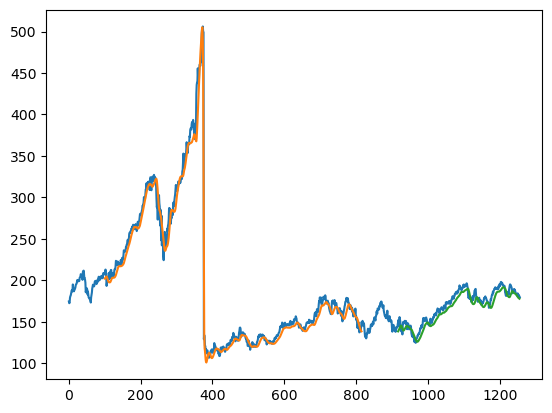

In [66]:
#plotting

#green is predicted output for test data
# yellow is for predicted output for train data
# blue is our actual line


#shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#predict the next days


In [67]:
len(test_data)

"""suppose in our test data our last day is 22nd may
to calc the output of 23rd d=may we have to take previous 100 days data
down below we are taking 340 to 440, 100 days data and reshaping it"""

440

In [69]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [70]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [71]:
temp_input

[0.18071383844708827,
 0.17921102066374445,
 0.18274264245460237,
 0.1850219160926737,
 0.18036318096430803,
 0.18003757044458357,
 0.17610519724483403,
 0.17282404508453347,
 0.17187226048841575,
 0.1654101440200375,
 0.1657107075767063,
 0.1668127739511584,
 0.16095178459611764,
 0.15040701314965554,
 0.1537382592360676,
 0.15892298058860355,
 0.16012523481527863,
 0.16814026299311202,
 0.17715716969317463,
 0.17485284909204757,
 0.1813149655604257,
 0.18780212899185966,
 0.19048215403882274,
 0.1892798998121477,
 0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0

In [ ]:
#prediction for next 30 days

In [72]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17616923]
101
1 day input [0.17921102 0.18274264 0.18502192 0.18036318 0.18003757 0.1761052
 0.17282405 0.17187226 0.16541014 0.16571071 0.16681277 0.16095178
 0.15040701 0.15373826 0.15892298 0.16012523 0.16814026 0.17715717
 0.17485285 0.18131497 0.18780213 0.19048215 0.1892799  0.19927364
 0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511
 0.22304321 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987
 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755
 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138
 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487
 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425
 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277 0.20408265
 0.20541014 0.20115216 0.19586725 0.

8 day output [[0.16092364]]
9 day input [0.16541014 0.16571071 0.16681277 0.16095178 0.15040701 0.15373826
 0.15892298 0.16012523 0.16814026 0.17715717 0.17485285 0.18131497
 0.18780213 0.19048215 0.1892799  0.19927364 0.19526612 0.20187852
 0.2033062  0.20756418 0.20751409 0.21192235 0.20989355 0.2115717
 0.2082154  0.20776456 0.20929242 0.20671259 0.20816531 0.21139637
 0.20686287 0.21685661 0.21410144 0.2189856  0.22259236 0.21625548
 0.22008766 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314
 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736
 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969
 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617
 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513
 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606
 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216
 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448
 0.1941891  0.18955542 

16 day output [[0.1436243]]
17 day input [0.16814026 0.17715717 0.17485285 0.18131497 0.18780213 0.19048215
 0.1892799  0.19927364 0.19526612 0.20187852 0.2033062  0.20756418
 0.20751409 0.21192235 0.20989355 0.2115717  0.2082154  0.20776456
 0.20929242 0.20671259 0.20816531 0.21139637 0.20686287 0.21685661
 0.21410144 0.2189856  0.22259236 0.21625548 0.22008766 0.22822793
 0.22860363 0.2272511  0.22304321 0.22567314 0.22038823 0.22001252
 0.21730745 0.21592987 0.21618034 0.21725736 0.21462743 0.19737007
 0.19388854 0.18802755 0.18619912 0.19716969 0.19611772 0.19874765
 0.19724483 0.19807138 0.19233563 0.18995617 0.20485911 0.21219787
 0.21803381 0.22126487 0.21956168 0.21873513 0.21435191 0.21262367
 0.20338134 0.19426425 0.2004258  0.19789606 0.20247965 0.20653726
 0.20681277 0.20408265 0.20541014 0.20115216 0.19586725 0.19363807
 0.19291171 0.18902943 0.18715091 0.18905448 0.1941891  0.18955542
 0.18614903 0.18983093 0.18680025 0.1851221  0.18239198 0.17616923
 0.17486851 0.1732423

24 day output [[0.12705255]]
25 day input [0.19526612 0.20187852 0.2033062  0.20756418 0.20751409 0.21192235
 0.20989355 0.2115717  0.2082154  0.20776456 0.20929242 0.20671259
 0.20816531 0.21139637 0.20686287 0.21685661 0.21410144 0.2189856
 0.22259236 0.21625548 0.22008766 0.22822793 0.22860363 0.2272511
 0.22304321 0.22567314 0.22038823 0.22001252 0.21730745 0.21592987
 0.21618034 0.21725736 0.21462743 0.19737007 0.19388854 0.18802755
 0.18619912 0.19716969 0.19611772 0.19874765 0.19724483 0.19807138
 0.19233563 0.18995617 0.20485911 0.21219787 0.21803381 0.22126487
 0.21956168 0.21873513 0.21435191 0.21262367 0.20338134 0.19426425
 0.2004258  0.19789606 0.20247965 0.20653726 0.20681277 0.20408265
 0.20541014 0.20115216 0.19586725 0.19363807 0.19291171 0.18902943
 0.18715091 0.18905448 0.1941891  0.18955542 0.18614903 0.18983093
 0.18680025 0.1851221  0.18239198 0.17616923 0.17486851 0.17324236
 0.17138937 0.16939737 0.16732661 0.16521284 0.1630753  0.16092364
 0.15876287 0.15659623

In [73]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [74]:

import matplotlib.pyplot as plt

In [75]:

len(df1)

1257

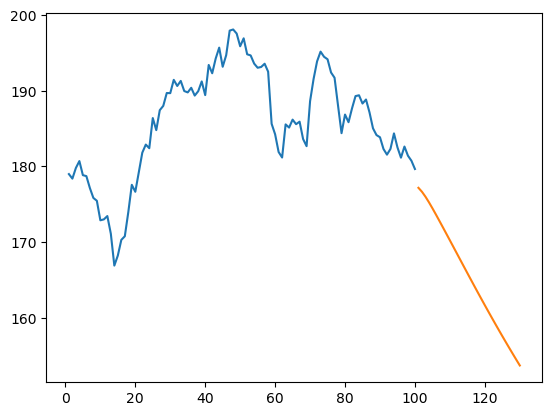

In [77]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

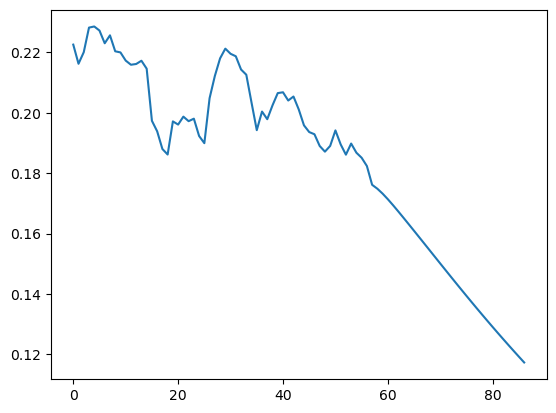

In [87]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [79]:

df3=scaler.inverse_transform(df3).tolist()

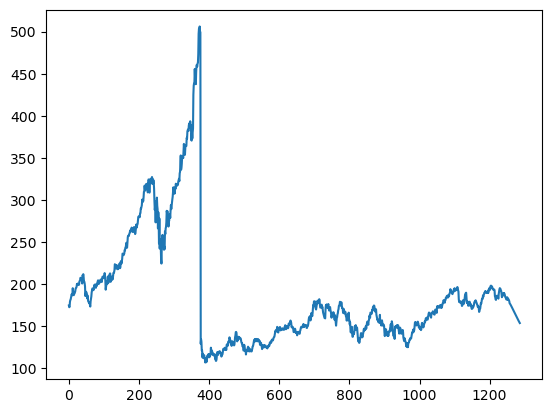

In [80]:
plt.plot(df3)